# TITANIC SURVIVAL PREDICTION

### The sinking of the Titanic is one of the most infamous shipwrecks in history.On  April  15,  1912,  during  her  maiden  voyage,  the  widely  considered  “unsinkable”  RMS  Titanic  sankafter  colliding  with  an  iceberg.  Unfortunately,  there  weren’t  enough  lifeboats  for  everyone  on  board,resulting in the death of 1502 out of 2224 passengers and crew.Use  the  Titanic  dataset  to  build  a  model  that  predicts  whether  a  passenger on  the  Titanic  survived ornot. This is a classic beginner project with readily available data.The  dataset  typically  used  for  this  project  contains  information  about  individual  passengers,  such  astheir age, gender, ticket class, fare, cabin, and whether or not they survived.

#### Importing necessary libraries

In [2]:
!pip install pycaret
!pip install tpot
!pip install lazypredict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from tpot import TPOTClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

ModuleNotFoundError: No module named 'lazypredict.Supervised'

In [3]:
!pip install catboost

#### Exploratory Data Analysis

In [4]:
df = pd.read_csv('C:/Users/sherr/Downloads/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.duplicated().sum()

0

#### Data Visualization

In [9]:
sex_counts=df['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

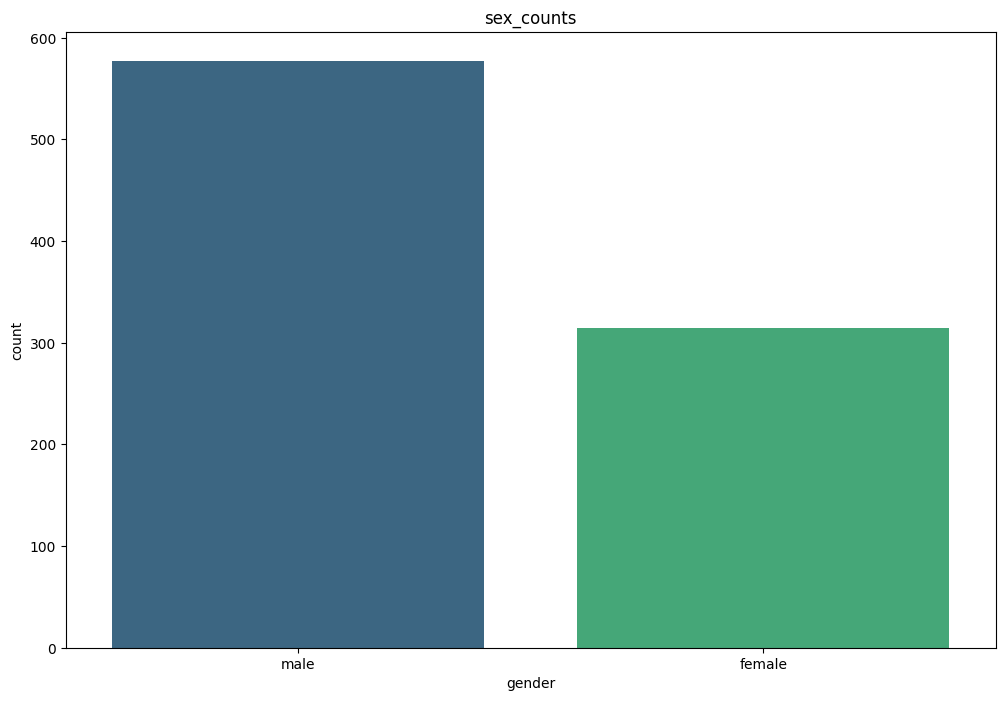

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='viridis')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

#### Data for top 5 ages

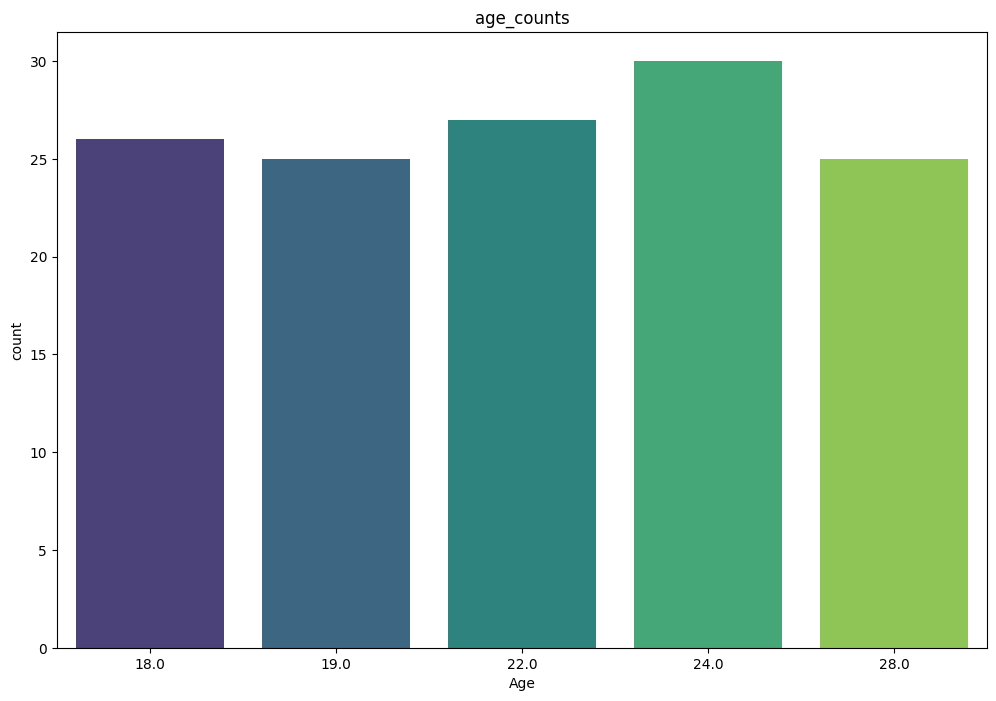

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
Name: count, dtype: int64

In [11]:
age_counts=df['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='viridis')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

In [12]:
pclass_counts=df['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

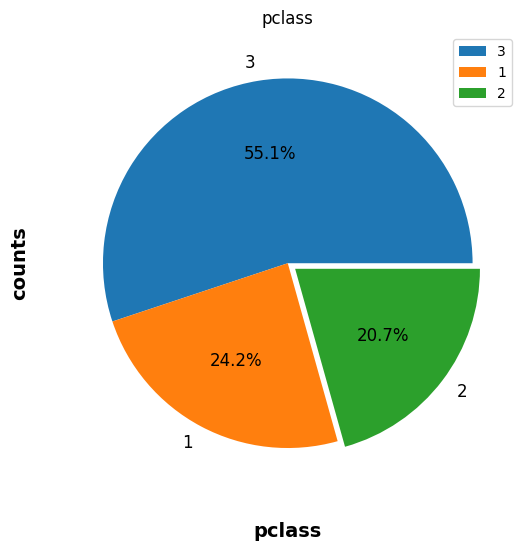

In [13]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

In [14]:
SibSp_counts=df['SibSp'].value_counts()
SibSp_counts

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

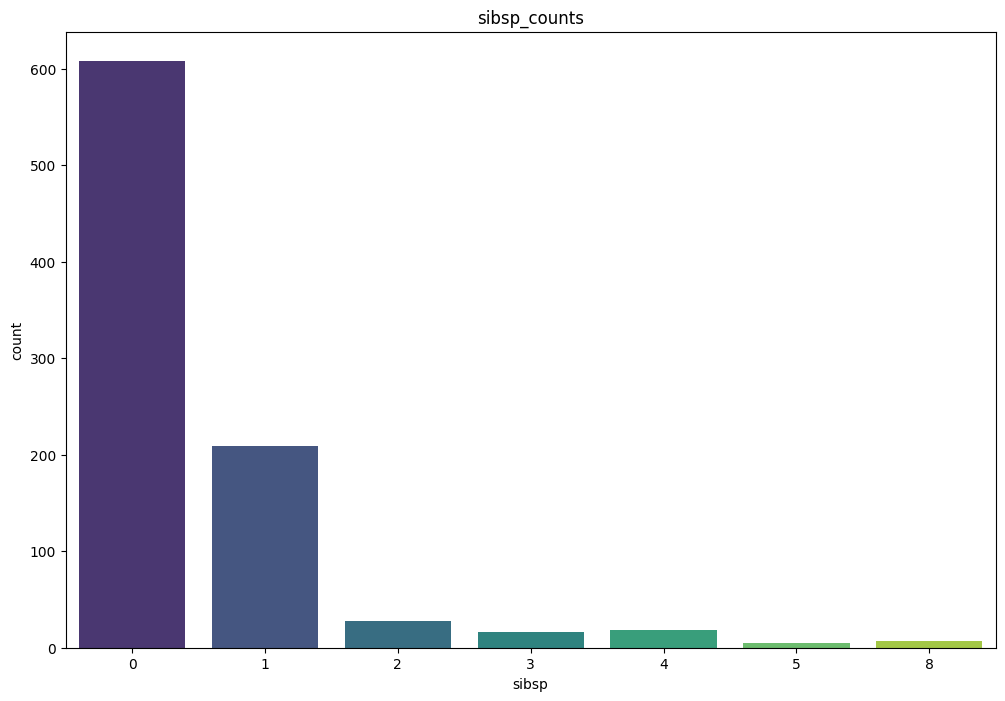

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='viridis')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

In [16]:
Parch_counts=df['Parch'].value_counts()
Parch_counts

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

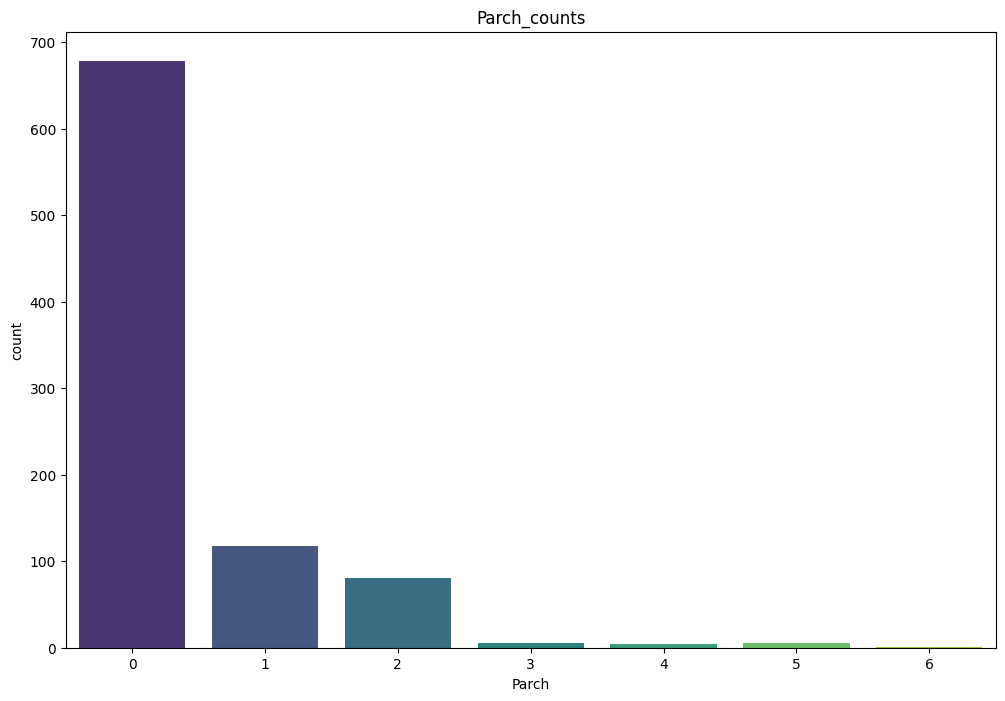

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='viridis')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

In [18]:
Embarked_counts=df['Embarked'].value_counts()
Embarked_counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

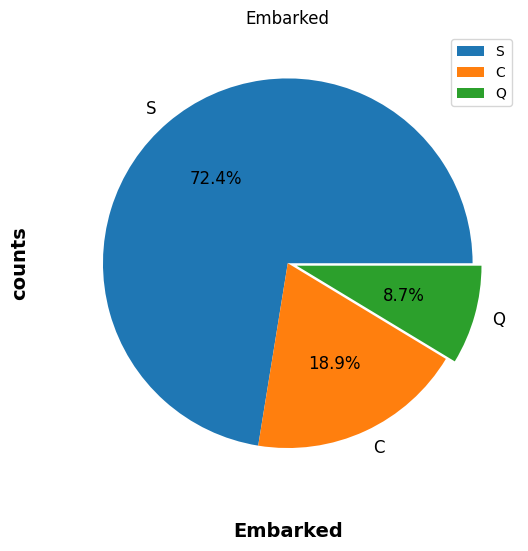

In [19]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

In [20]:
Survived_counts=df['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

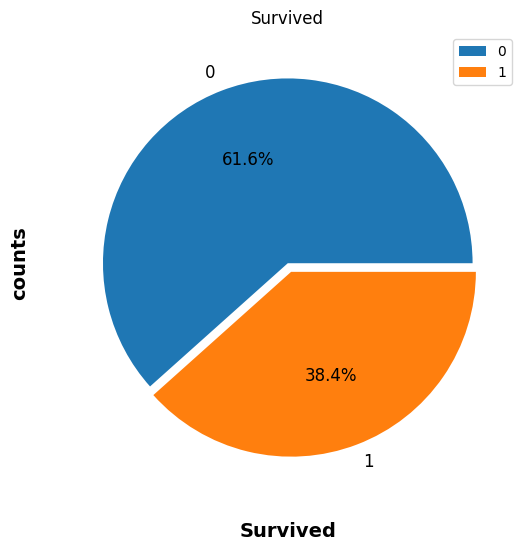

In [21]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

#### Visualization of ages (survived or not survived)

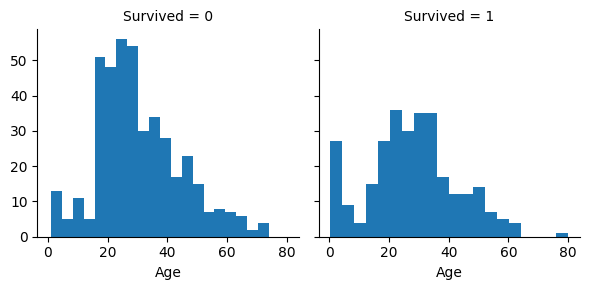

In [22]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)

#### Visualization of gender (survived or not survived)

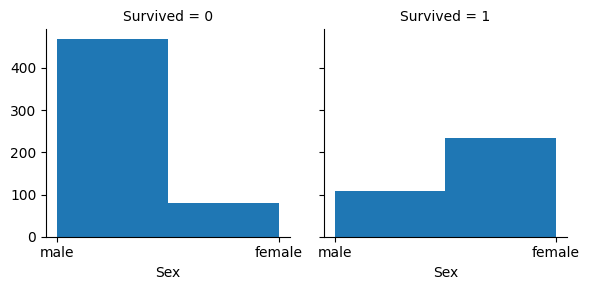

In [23]:
gender=sns.FacetGrid(df,col='Survived')

gender.map(plt.hist,'Sex',bins=2)

#### Visualization of sibsp (survived or not survived)

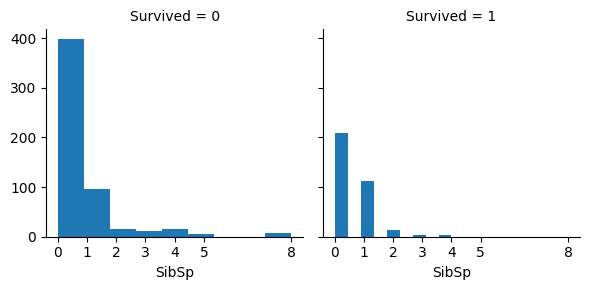

In [24]:
sibsp=sns.FacetGrid(df,col='Survived')
plt.xticks(SibSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)

#### Visualization of pclass (survived or not survived)

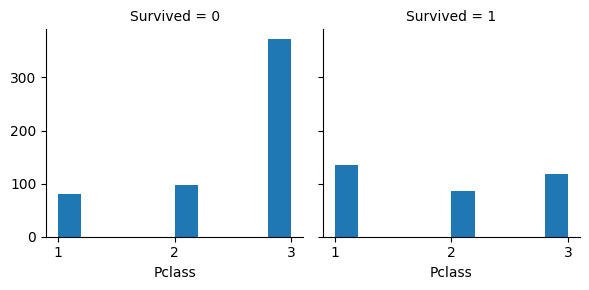

In [25]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

#### Visualization of Parch (survived or not survived)

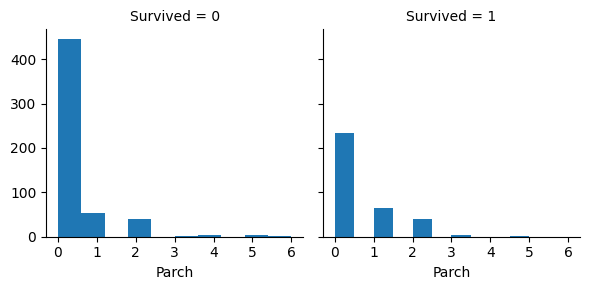

In [26]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks(Parch_counts.index)
pclass.map(plt.hist,'Parch')

#### Data Preprocessing

In [27]:
df=df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S


#### Converting the gender to 0 and 1

In [28]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,S
1,1,1,0,38.00,1,0,71.28,C
2,1,3,0,26.00,0,0,7.92,S
3,1,1,0,35.00,1,0,53.10,S
4,0,3,1,35.00,0,0,8.05,S


#### Filling the missing values in age column by imputing the median

In [29]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Filling the missing values in embarked column by imputing the mode

In [30]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1


In [32]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.34,-0.54,-0.06,-0.04,0.08,0.26,0.11
Pclass,-0.34,1.00,0.13,-0.34,0.08,0.02,-0.55,0.05
Sex,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,-0.12
Age,-0.06,-0.34,0.08,1.00,-0.23,-0.17,0.10,-0.01
SibSp,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,-0.06
Parch,0.08,0.02,-0.25,-0.17,0.41,1.00,0.22,-0.08
Fare,0.26,-0.55,-0.18,0.10,0.16,0.22,1.00,0.06
Embarked,0.11,0.05,-0.12,-0.01,-0.06,-0.08,0.06,1.00


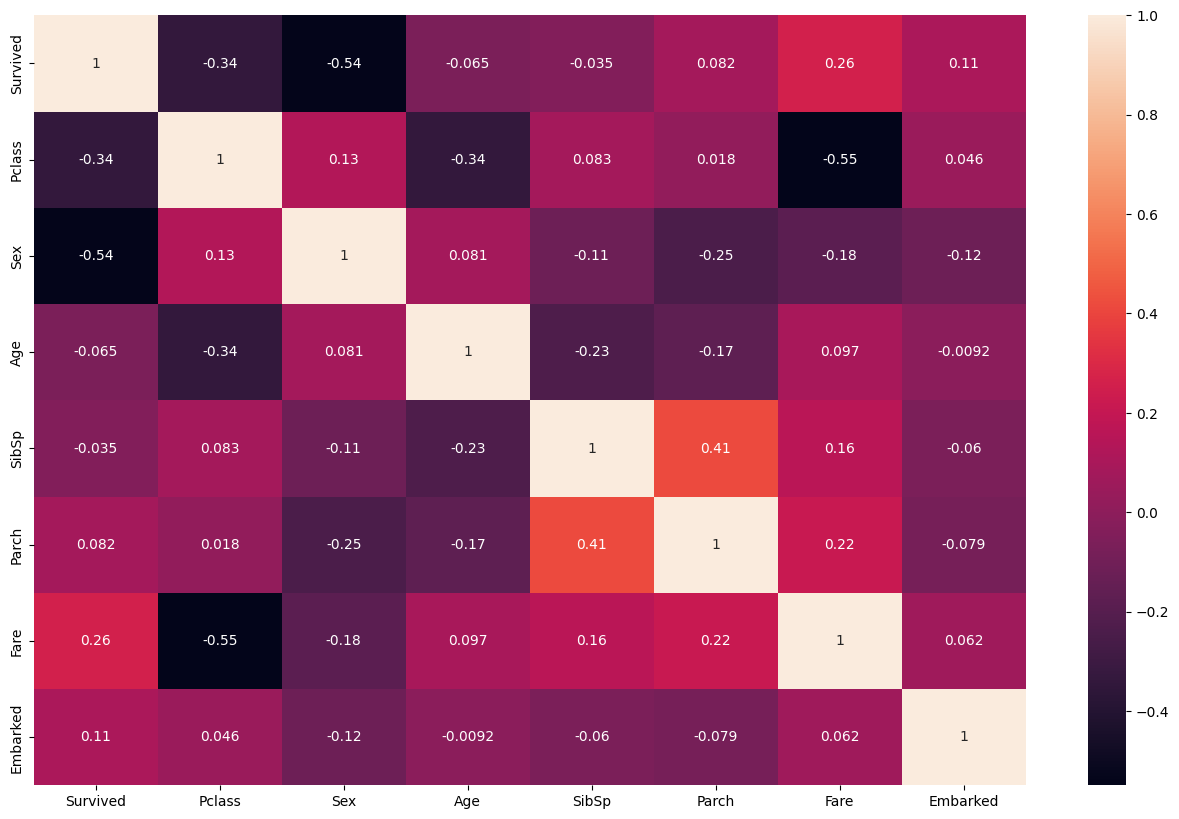

In [33]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Defining the features and the target

In [34]:
x=df.drop(columns=['Survived'])
y=df['Survived']

#### Data Scaling

In [35]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

#### Reshape to y

In [36]:
y=y.values.reshape(-1,1)

#### Splitting the data

In [37]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

### Models

#### 1. Logistic Regression

In [38]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
lg.score(X_train,y_train)

0.800561797752809

In [40]:
y_pred=lg.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7988826815642458


[[90 15]
 [21 53]]


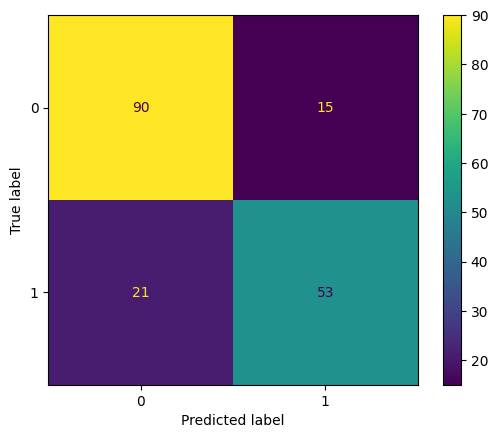

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



#### 2. Decision Tree

In [44]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
Dt.score(X_train,y_train)

0.9789325842696629

In [46]:
y_pred=Dt.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.7821229050279329


[[85 20]
 [19 55]]


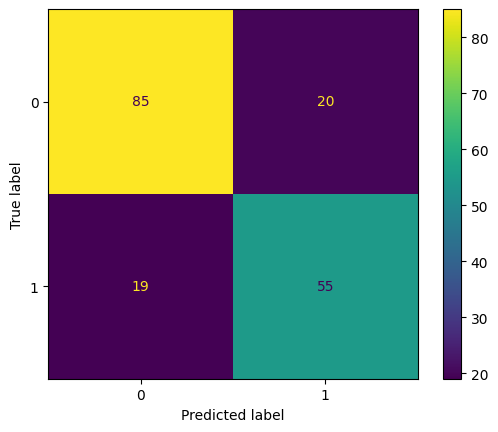

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



#### 3. Random Forest Classifier

In [50]:
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [51]:
Rf.score(X_train,y_train)

0.9789325842696629

In [52]:
y_pred=Rf.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_pred))

0.8044692737430168


[[89 16]
 [19 55]]


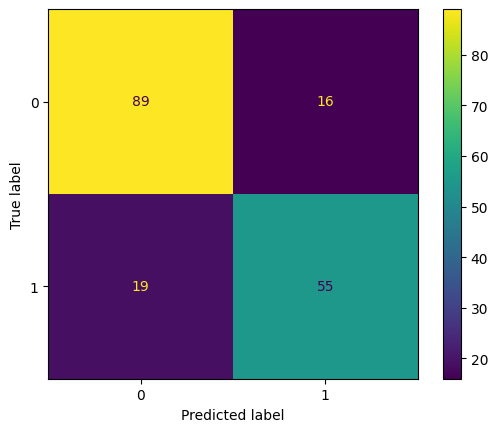

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



#### 4. K-Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
knn.score(X_train,y_train)

0.8581460674157303

In [58]:
pred=knn.predict(X_test)

In [59]:
print(accuracy_score(y_test,y_pred))

0.8044692737430168


[[89 16]
 [19 55]]


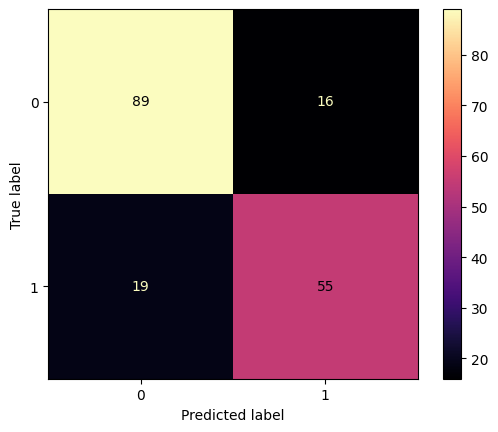

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

#### 5. Support Vector Classification

In [61]:
svm = SVC(kernel="rbf", C=1.0)
svm.fit(X_train, y_train)

SVC()

In [62]:
svm.score(X_train, y_train)

0.8160112359550562

In [63]:
y_pre=svm.predict(X_test)

In [64]:
print(accuracy_score(y_test,y_pre))

0.7932960893854749


[[95 10]
 [27 47]]


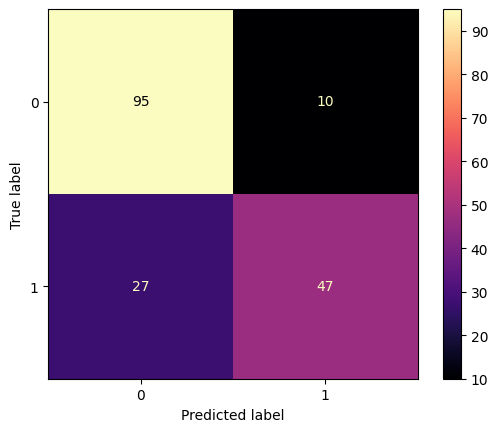

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pre,cmap="magma")
print(confusion_matrix(y_test, y_pre))

#### 6. Naive Bayes

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [67]:
svm.score(X_train, y_train)

0.8160112359550562

In [68]:
y_pr=svm.predict(X_test)

In [69]:
print(accuracy_score(y_test,y_pre))

0.7932960893854749


[[95 10]
 [27 47]]


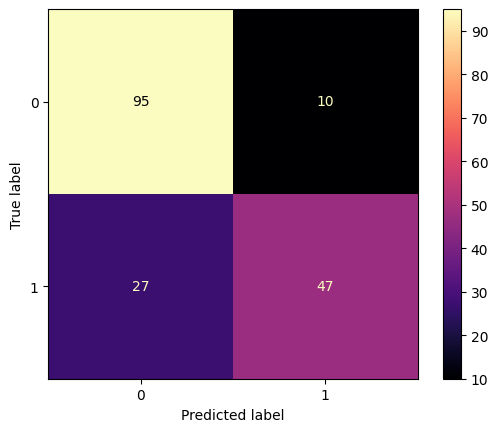

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pr,cmap="magma")
print(confusion_matrix(y_test, y_pr))

#### 7. XGBoost

In [71]:
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68007
[1]	validation_0-logloss:0.67957
[2]	validation_0-logloss:0.67906
[3]	validation_0-logloss:0.67855
[4]	validation_0-logloss:0.67805
[5]	validation_0-logloss:0.67754
[6]	validation_0-logloss:0.67704
[7]	validation_0-logloss:0.67654
[8]	validation_0-logloss:0.67604
[9]	validation_0-logloss:0.67554
[10]	validation_0-logloss:0.67504
[11]	validation_0-logloss:0.67454
[12]	validation_0-logloss:0.67405
[13]	validation_0-logloss:0.67355
[14]	validation_0-logloss:0.67306
[15]	validation_0-logloss:0.67256
[16]	validation_0-logloss:0.67207
[17]	validation_0-logloss:0.67158
[18]	validation_0-logloss:0.67109
[19]	validation_0-logloss:0.67060
[20]	validation_0-logloss:0.67011
[21]	validation_0-logloss:0.66963
[22]	validation_0-logloss:0.66914
[23]	validation_0-logloss:0.66866
[24]	validation_0-logloss:0.66817
[25]	validation_0-logloss:0.66769
[26]	validation_0-logloss:0.66721
[27]	validation_0-logloss:0.66673
[28]	validation_0-logloss:0.66625
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [72]:
xg.score(X_train, y_train)

0.8735955056179775

In [73]:
ypred=xg.predict(X_test)

In [74]:
print(accuracy_score(y_test,ypred))

0.8324022346368715


[[98  7]
 [23 51]]


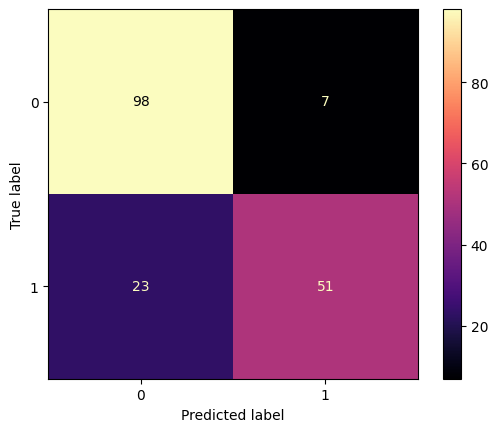

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, ypred,cmap="magma")
print(confusion_matrix(y_test, ypred))

#### 8. Boosting Classifier

In [76]:
from catboost import CatBoostClassifier
catboost_clf = CatBoostClassifier(iterations=5000, depth=5, learning_rate=0.001, random_state=0)
catboost_clf.fit(X_train, y_train)

0:	learn: 0.6924350	total: 143ms	remaining: 11m 54s
1:	learn: 0.6917019	total: 144ms	remaining: 6m
2:	learn: 0.6912985	total: 145ms	remaining: 4m 1s
3:	learn: 0.6907066	total: 146ms	remaining: 3m 2s
4:	learn: 0.6903212	total: 147ms	remaining: 2m 26s
5:	learn: 0.6897012	total: 148ms	remaining: 2m 2s
6:	learn: 0.6890739	total: 149ms	remaining: 1m 46s
7:	learn: 0.6884187	total: 150ms	remaining: 1m 33s
8:	learn: 0.6878918	total: 151ms	remaining: 1m 23s
9:	learn: 0.6873043	total: 152ms	remaining: 1m 15s
10:	learn: 0.6866710	total: 153ms	remaining: 1m 9s
11:	learn: 0.6860669	total: 154ms	remaining: 1m 3s
12:	learn: 0.6853595	total: 155ms	remaining: 59.4s
13:	learn: 0.6847475	total: 156ms	remaining: 55.5s
14:	learn: 0.6840409	total: 157ms	remaining: 52.2s
15:	learn: 0.6833415	total: 158ms	remaining: 49.3s
16:	learn: 0.6827411	total: 159ms	remaining: 46.7s
17:	learn: 0.6820173	total: 160ms	remaining: 44.4s
18:	learn: 0.6813997	total: 162ms	remaining: 42.4s
19:	learn: 0.6808116	total: 163ms	rem

In [77]:
print(catboost_clf.score(X_test, y_test))

0.5266065353765488


In [78]:
y_pred=catboost_clf.predict(X_test)

In [79]:
print(accuracy_score(y_test,y_pred))

0.8100558659217877


[[94 11]
 [23 51]]


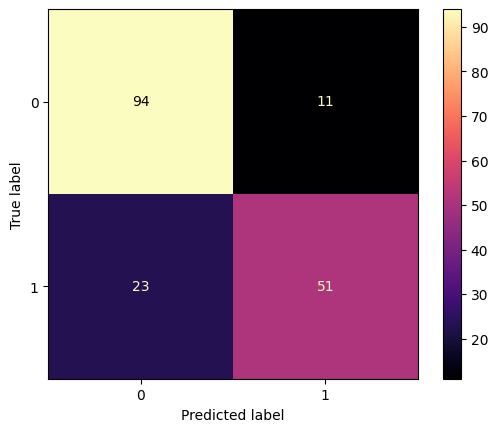

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

#### 9. Light Gradient Boosting

In [81]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)

In [82]:
print(lgbm.score(X_train, y_train))

0.9466292134831461


In [83]:
y_pred=lgbm.predict(X_test)

In [84]:
print(accuracy_score(y_test,y_pred))

0.8268156424581006


[[89 16]
 [15 59]]


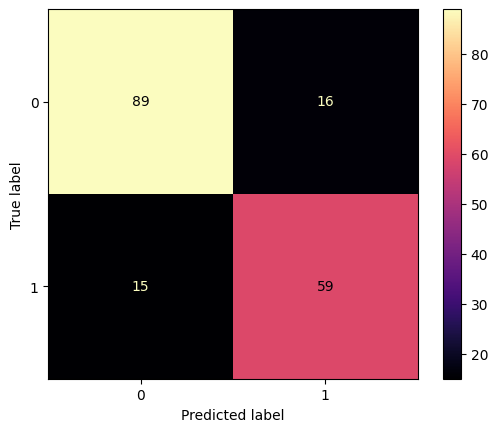

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

#### 10. Voting Classifier

In [86]:
estimator = []
estimator.append(('LR', LogisticRegression()))
estimator.append(('SVC', SVC(gamma ='auto', C=5)))
estimator.append(('DTC', DecisionTreeClassifier()))

vot = VotingClassifier(estimators=estimator, voting='hard')
vot.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('SVC', SVC(C=5, gamma='auto')),
                             ('DTC', DecisionTreeClassifier())])

In [87]:
print(vot.score(X_train, y_train))

0.8230337078651685


In [88]:
print(vot.score(X_test, y_test))

0.7932960893854749


#### 11. Tree-based Pipeline Optimization Tool Classifier

In [89]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, verbosity=2)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8427164384910864

Generation 2 - Current best internal CV score: 0.8427164384910864

Generation 3 - Current best internal CV score: 0.8427164384910864

Generation 4 - Current best internal CV score: 0.8427164384910864

Generation 5 - Current best internal CV score: 0.8427164384910864

Generation 6 - Current best internal CV score: 0.8427164384910864

Generation 7 - Current best internal CV score: 0.8427164384910864

Generation 8 - Current best internal CV score: 0.8427164384910864

Generation 9 - Current best internal CV score: 0.8427164384910864

Generation 10 - Current best internal CV score: 0.8427164384910864

Best pipeline: RandomForestClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.05, sparse=False, threshold=10), bootstrap=True, criterion=gini, max_features=0.1, min_samples_leaf=1, min_samples_split=14, n_estimators=100)


TPOTClassifier(generations=10, verbosity=2)

In [90]:
print(tpot.score(X_train, y_train))

0.8890449438202247


In [91]:
yred=tpot.predict(X_test)

In [92]:
print(tpot.score(X_test, y_test))  

0.8324022346368715


[[89 16]
 [15 59]]


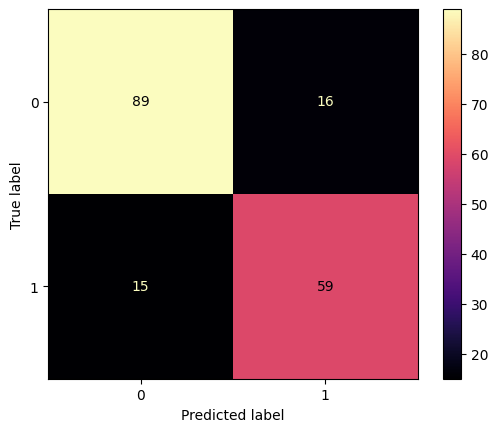

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="magma")
print(confusion_matrix(y_test, y_pred))

#### 12. Lazy Classification

In [94]:
!pip install lazypredict

In [107]:
!pip install --upgrade mlxtend

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load dataset 
df = pd.read_csv('C:/Users/sherr/Downloads/Titanic-Dataset.csv')

# Handle non-numeric values 
df_encoded = pd.get_dummies(df)

# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Define a list of classifiers
classifiers = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "LabelSpreading": LabelSpreading(),
    "SVC": SVC(),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "NuSVC": NuSVC(),
    "LabelPropagation": LabelPropagation(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "NearestCentroid": NearestCentroid(),
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "LinearSVC": LinearSVC(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "BaggingClassifier": BaggingClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "SGDClassifier": SGDClassifier(),
    "Perceptron": Perceptron(),
    "DummyClassifier": DummyClassifier(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_imputed, y_train)
    y_pred = clf.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [118]:
import time
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, f1_score

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_imputed, y_train)
    end_time = time.time()
    y_pred = clf.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)
    bal_accuracy = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time_taken = end_time - start_time
    results[name] = {
        'Accuracy': accuracy,
        'Balanced Accuracy': bal_accuracy,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Time Taken (s)': time_taken
    }

# Print results
print("Model\t\t\tAccuracy\tBalanced Accuracy\tROC AUC\t\tF1 Score\tTime Taken (s)")
print("----------------------------------------------------------------------------------")
for name, metrics in results.items():
    print(f"{name.ljust(20)}\t{metrics['Accuracy']:.4f}\t\t{metrics['Balanced Accuracy']:.4f}\t\t{metrics['ROC AUC']:.4f}\t\t{metrics['F1 Score']:.4f}\t\t{metrics['Time Taken (s)']:.4f}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best